In [57]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df1=pd.read_csv('D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/5_Multi Linear Regression/50_Startups.csv')
#df1

In [3]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df1.info()  # Checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##### Note: Here, state is categorical variable so need to convert it into numerical data.

In [5]:
df1.isnull().sum()       # Checking for NUll Values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df1[df1.values==0.0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
df1=df1.copy()   # Renaming the columns
df1=df1.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df1.head()
print('Zero Values in R&D Spend is',(df1['RnD'] == 0).sum(),'\n'
      'Zero Values in Administration is',(df1['admin'] == 0).sum(),'\n'
      'Zero Values in Marketing is',(df1['marketing'] == 0).sum(),'\n'
      'Zero Values in Profit is',(df1['profit'] == 0).sum())


Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing is 3 
Zero Values in Profit is 0


## Visualizing missing value

<AxesSubplot:>

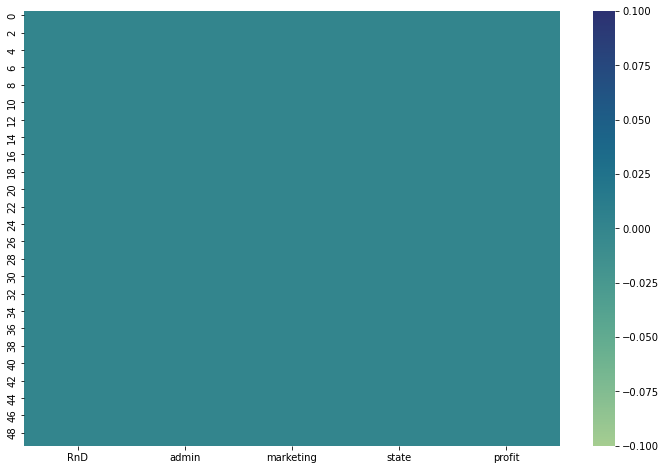

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.isnull(),cmap='crest')

No missing values are present in the dataset

In [9]:
df1[df1.duplicated()].shape

(0, 5)

In [10]:
df1.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

There are no duplicate values in the dataset.

### Scatterplot between variables along with Histograms

In [11]:
df1.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

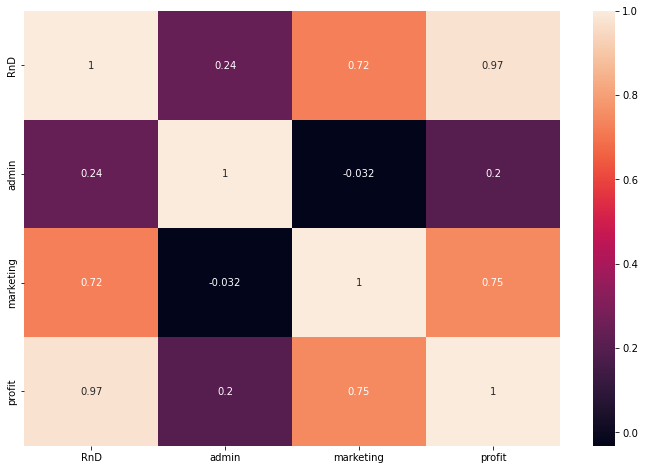

In [12]:
# Plotting correlation
plt.figure(figsize=(12,8))
sns.heatmap(
    df1.corr(),
    annot=True)

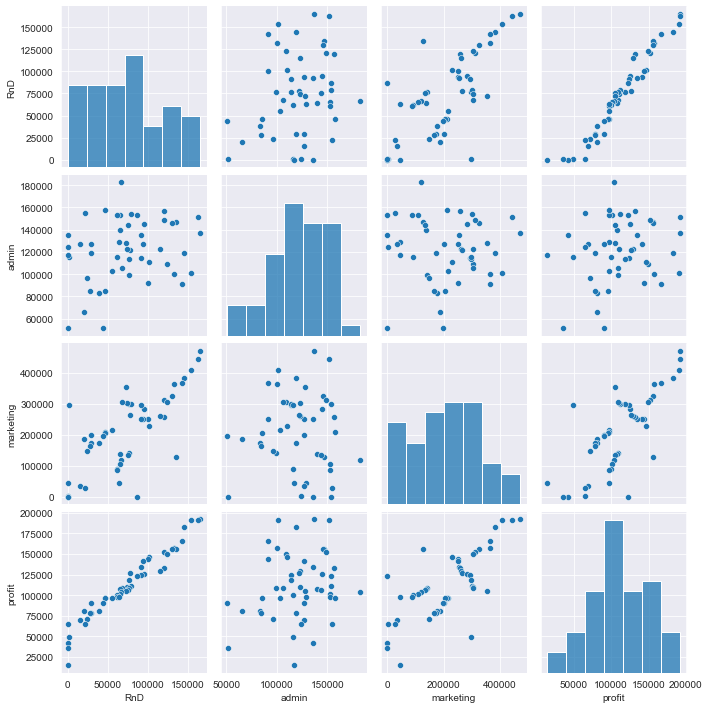

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

#### Observations:
R & D feature has a linear relation with profit as compared to other features.

## Building the model

In [14]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('profit~RnD+admin+marketing',data=df1).fit()

In [15]:
#Coefficients
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RnD          17.846374
admin        -0.525507
marketing     1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64


In [17]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

### Detecting Outliers

#Using Box Plot Method

In [18]:
## Let's check dataset for outlier detection
df1.columns
#data.boxplot(column=feature)
#plt.title(feature)
#plt.show()

Index(['RnD', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [19]:
cont_feature=[feature for feature in df1.columns if df1[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(cont_feature)))

Continuous Feature Count 4


In [20]:
cont_feature

['RnD', 'admin', 'marketing', 'profit']

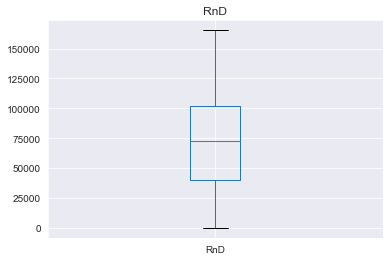

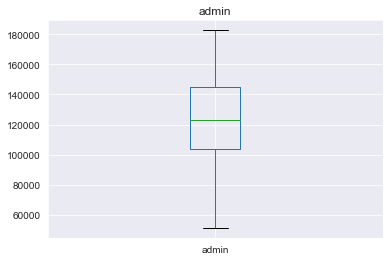

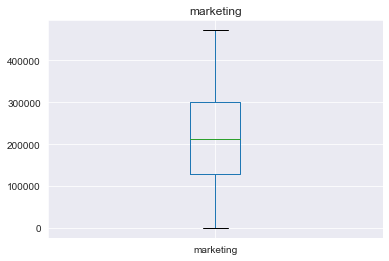

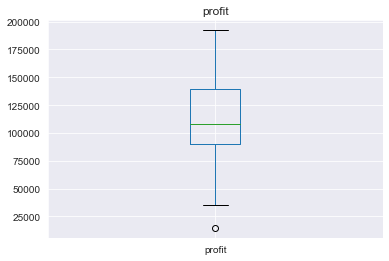

In [21]:
for feature in cont_feature:
    new_data=df1.copy()  
    new_data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

Observations:
There is outlier in Profit, but no outliers in other features. 
We need to remove outlier. There are several methods to remove outliers.


## Using Cook's distance

In [22]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

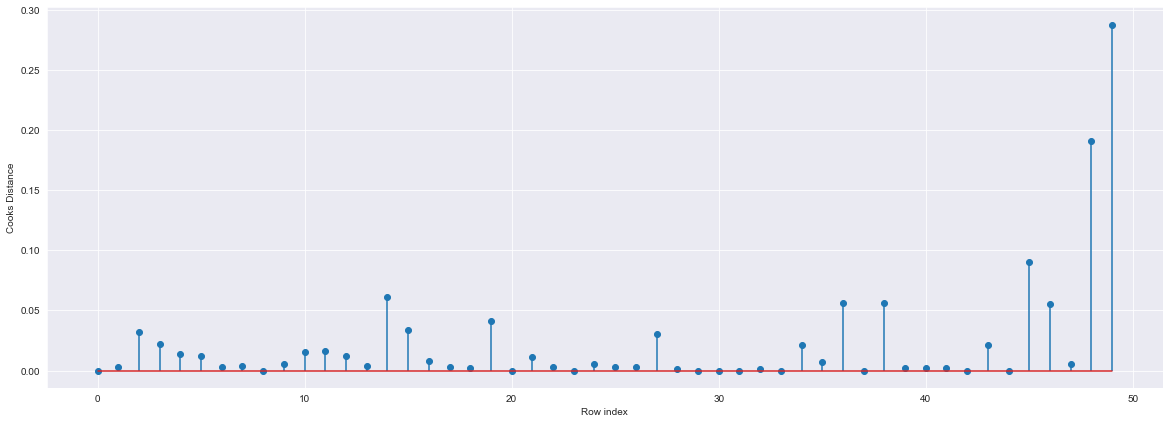

In [23]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [25]:
display(df1[df1.index.isin([49])])

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


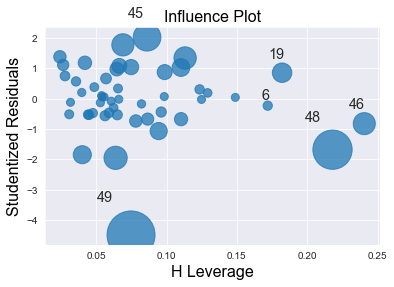

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

### Let's try mean,median method to handle outlier. 

In [27]:
# first find mean and median value of dataset
df2=df1.copy()
df3=df1.copy()
print('The mean value of profit is:',df1.profit.mean(),'The median value of profit is:',df1.profit.median())



The mean value of profit is: 112012.63920000002 The median value of profit is: 107978.19


,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,107978.19


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


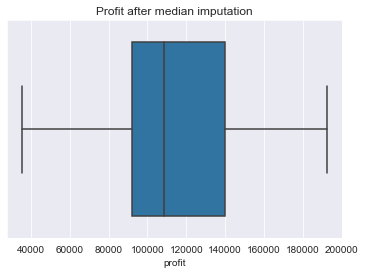

In [28]:
## Replacing outlier with mean value
df2['profit'] = df2['profit'].replace(14681.4, np.median(df1['profit']))
display(df2[df2.index.isin([49])])
sns.boxplot(df2['profit'])
plt.title('Profit after median imputation')
plt.show()

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,112012.6392


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


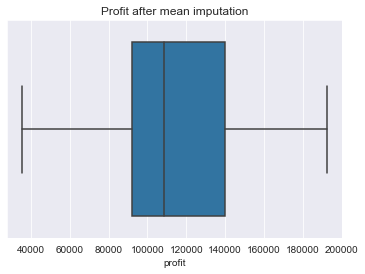

In [29]:
df3['profit'] = df3['profit'].replace(14681.4, np.mean(df1['profit']))
display(df3[df3.index.isin([49])])
sns.boxplot(df3['profit'])
plt.title('Profit after mean imputation')
plt.show()

In [30]:
model_after_mean_imputation = sm.ols("profit~RnD+admin+marketing", data = df3).fit()
# Finding rsquared values
model_after_mean_imputation.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.82e-24
Time:                        08:45:09   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RnD            0.7447      0.057     13.162      0.000       0.631       0.859
admin         -0.0144      0.064     -0.226      0.823      -0.143       0.114
marketing      0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model_after_median_imputation = sm.ols("profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
model_after_median_imputation.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           5.06e-25
Time:                        08:45:09   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RnD            0.7472      0.055     13.707      0.000       0.638       0.857
admin         -0.0149      0.062     -0.242      0.810      -0.139       0.109
marketing      0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### In both above models, it is observed that R-squared and adjusted R-Squared are not improving after applying outlier correction method.
So, Lets drop the outlier and check the above values again.

In [32]:
df4=df1.copy()
df4=df4.drop([49])   # Dropped 49th row as it has outlier.


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Profit after removing outliers')

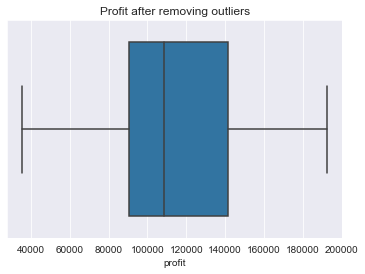

In [33]:
# Plotting box plot after removing outliers
sns.boxplot(df4.profit)
plt.title('Profit after removing outliers')

Let's apply the OLS model to new data without outlier

In [34]:
model_after_removing_outlier = sm.ols("profit~RnD+admin+marketing", data = df4).fit()
# Finding rsquared values
model_after_removing_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        08:45:10   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary of R-Squared and Adjusted R Squared values
With mean imputation treatment    R-Squared=0.912       Adjusted R Squared values=0.906
With meadian imputation treatment R-Squared=0.918       Adjusted R Squared values=0.913
After dropping outlier            R-Squared=0.961       Adjusted R Squared values=0.959

### From above comparision, it is evidently proved that after dropping outlier R-Squared and Adjusted R-Squared are improved.

### Let's visualize the distribution of indepenedt features with help of histograms and QQ plot.

#### Visualization of data without any transformation

In [35]:
import pylab
def plotdata(data,feature):    # Define Function
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Profit')

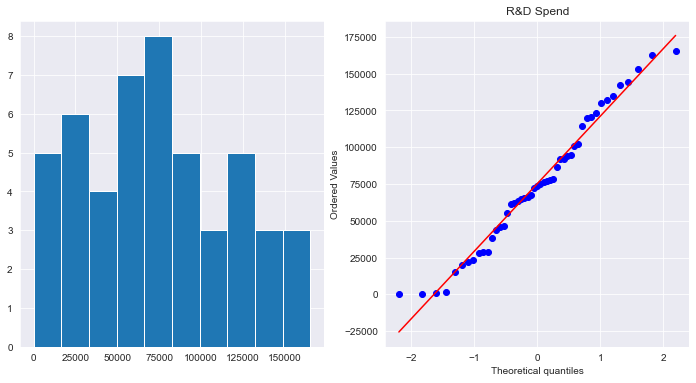

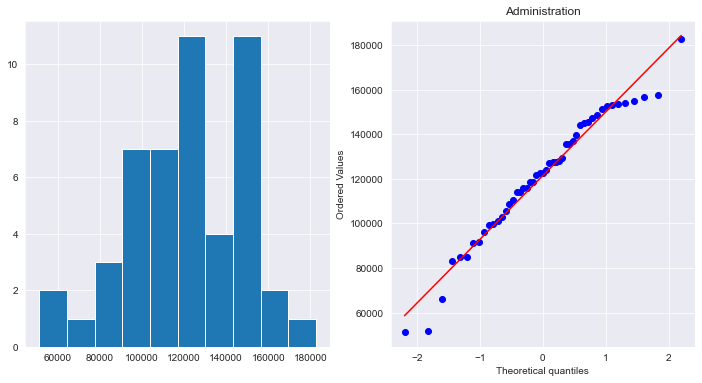

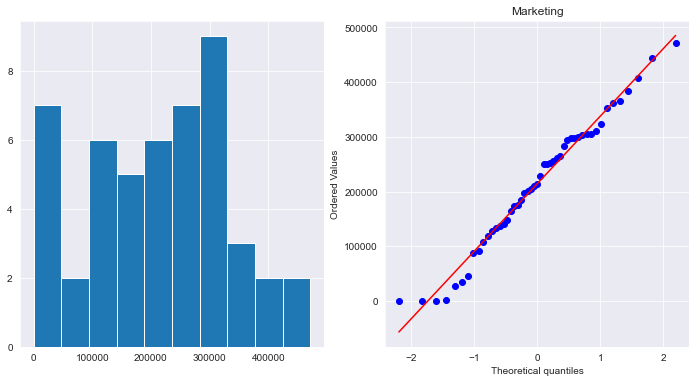

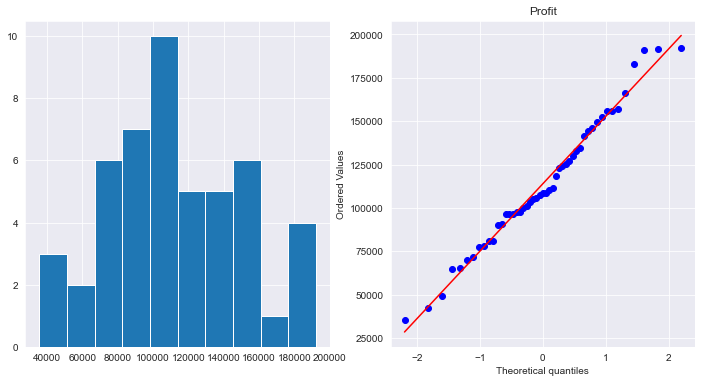

In [36]:
plotdata(df4,'RnD')
plt.title('R&D Spend')
plotdata(df4,'admin')
plt.title('Administration')
plotdata(df4,'marketing')
plt.title('Marketing')
plotdata(df4,'profit')
plt.title('Profit')

#### Square Root Transformation

Text(0.5, 1.0, 'Profit')

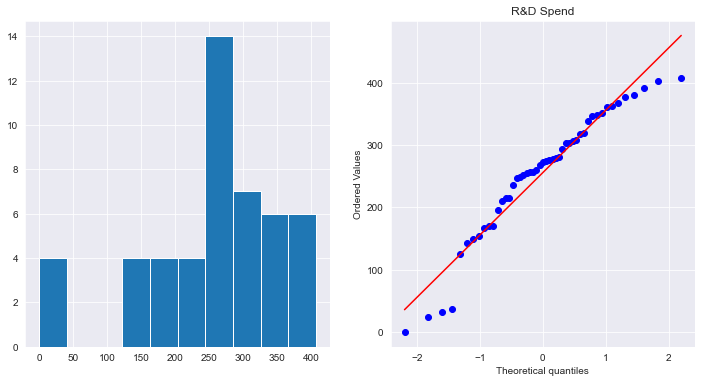

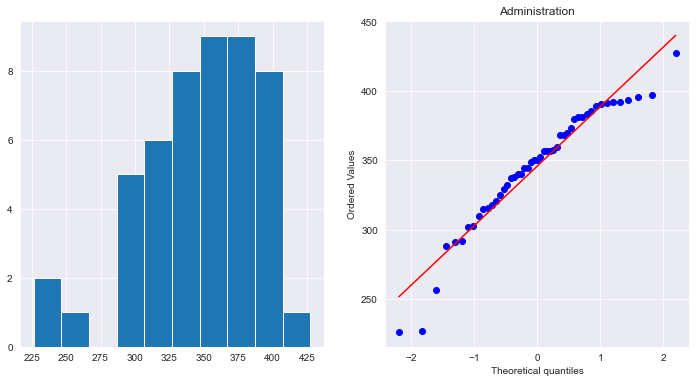

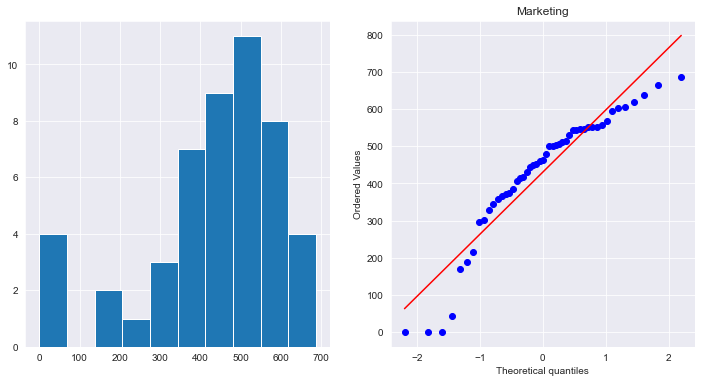

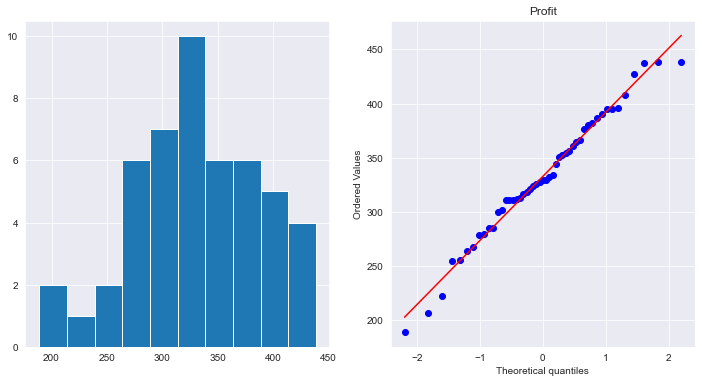

In [37]:
df_sqrt=df4.copy()
df_sqrt[cont_feature]=np.sqrt(df_sqrt[cont_feature])

plotdata(df_sqrt,'RnD')
plt.title('R&D Spend')
plotdata(df_sqrt,'admin')
plt.title('Administration')
plotdata(df_sqrt,'marketing')
plt.title('Marketing')
plotdata(df_sqrt,'profit')
plt.title('Profit')

Text(0.5, 1.0, 'Profit')

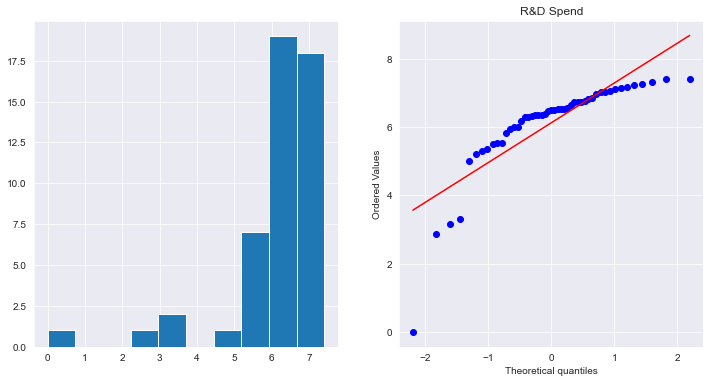

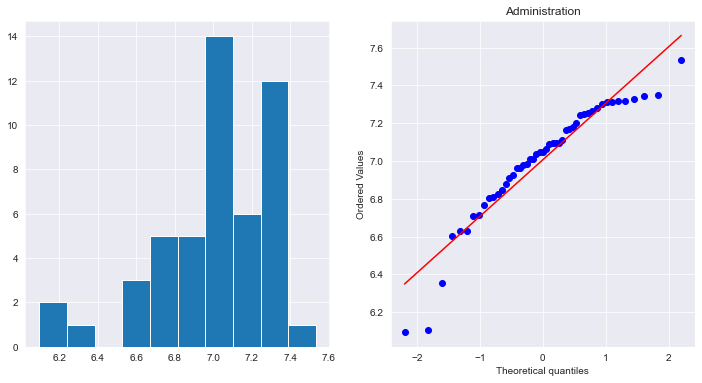

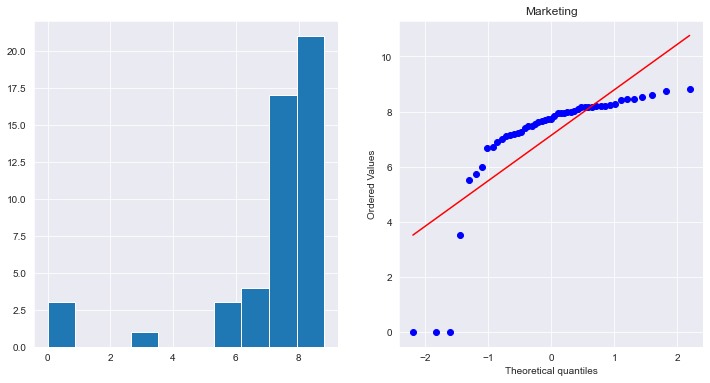

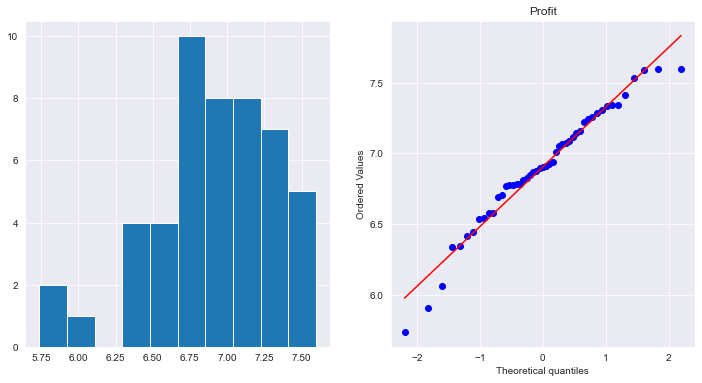

In [38]:
df_cbrt=df4.copy()
df_cbrt[cont_feature]=np.cbrt(df_sqrt[cont_feature])

plotdata(df_cbrt,'RnD')
plt.title('R&D Spend')
plotdata(df_cbrt,'admin')
plt.title('Administration')
plotdata(df_cbrt,'marketing')
plt.title('Marketing')
plotdata(df_cbrt,'profit')
plt.title('Profit')

<AxesSubplot:ylabel='state'>

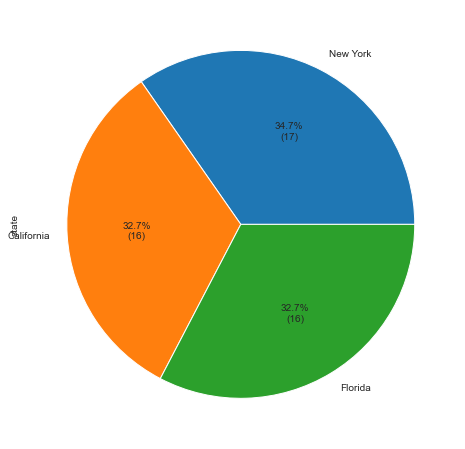

In [39]:
### Checking distribution of categorical data "State"
plt.figure(figsize=(8,8))
df4['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.1f}%\n({:.0f})'.format(p,(p/100)*(df3['state'].value_counts().sum())))


In [40]:
df4.state.value_counts()

New York      17
California    16
Florida       16
Name: state, dtype: int64

### Observation: 
The 'State' category has normally distributed data and the other continous features are also normally distributed.

### Simple linear regression models
we will check dependancy of other featurtures on target features

In [41]:
model_with_admin = sm.ols("profit~admin", data = df4).fit()
model_with_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Wed, 21 Dec 2022   Prob (F-statistic):              0.156
Time:                        08:45:16   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
admin          0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Finding tvalues and pvalues
display(np.round(model_with_admin.tvalues,3), np.round(model_with_admin.pvalues,3))


Intercept    3.346
admin        1.442
dtype: float64

Intercept    0.002
admin        0.156
dtype: float64

In [43]:
model_with_marketing = sm.ols("profit~marketing", data = df4).fit()
model_with_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.30e-09
Time:                        08:45:16   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
marketing      0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#Let's combine 
model_with_adminandmarketing= sm.ols('profit~admin+marketing', data =df4).fit()
# Finding rsquared values
model_with_adminandmarketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           6.59e-10
Time:                        08:45:16   Log-Likelihood:                -563.45
No. Observations:                  49   AIC:                             1133.
Df Residuals:                      46   BIC:                             1139.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.519e+04   1.71e+04      1.474      0.147   -9208.231    5.96e+04
admin          0.3152      0.126      2.508      0.016       0.062       0.568
marketing      0.2356      0.029      8.027      0.000       0.177       0.295
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### To detect Multicolinearity, Let's find VIF (Variance Inflation Factor)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,4.218831
0,marketing,7.589312
2,RnD,8.602235


In [46]:
model_with_rnd_admin= sm.ols('profit~RnD+admin', data= df4).fit()
model_with_rnd_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.69e-32
Time:                        08:45:16   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
model_with_rnd_marketing= sm.ols('profit~RnD+marketing', data= df4).fit()
model_with_rnd_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.74e-33
Time:                        10:19:05   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model_with_rnd= sm.ols('profit~RnD', data= df4).fit()
model_with_rnd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.56e-34
Time:                        08:46:14   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RnD            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations:
We get better score for R-squared, Adjusted R-Squared,p-value, AIC, BIC, and F-statistics score While building a model using Marketing  as compared to the model in which Adminstration feature was used.

## Residual Analysis

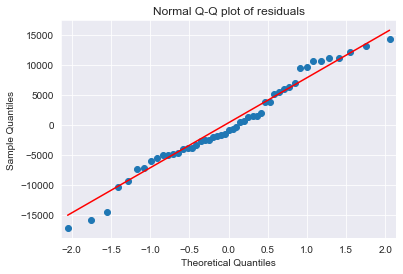

In [62]:
#Residuals values  = y - yhat
smf.qqplot(model_with_rnd_marketing.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

### Observation:
The error is normally/gaussian ~N(0,1) are independently and identically distributed 

### Residual Plot for Homoscedasticity

In [64]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

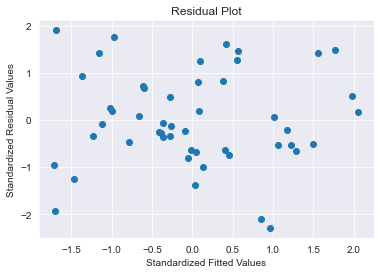

In [65]:
plt.scatter(get_standardized_values(model_with_rnd_marketing.fittedvalues), get_standardized_values(model_with_rnd_marketing.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Observations:
As observed in above figure, variance is not uniform/constant. So, There is no homoscedacity.

### Residual vs Regressors

eval_env: 1


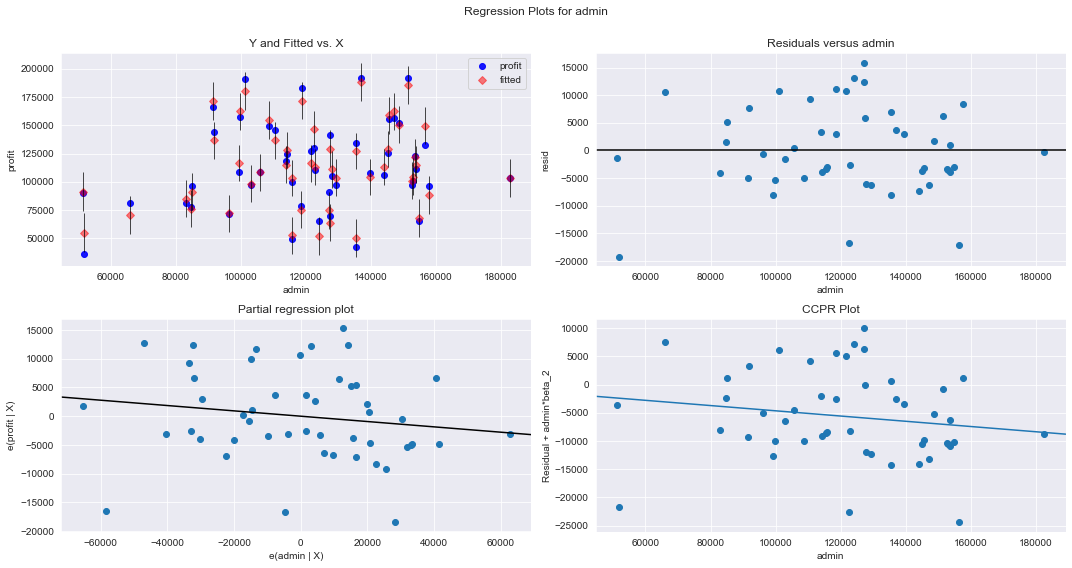

In [66]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model_with_rnd_admin, "admin", fig=fig)
plt.show()

eval_env: 1


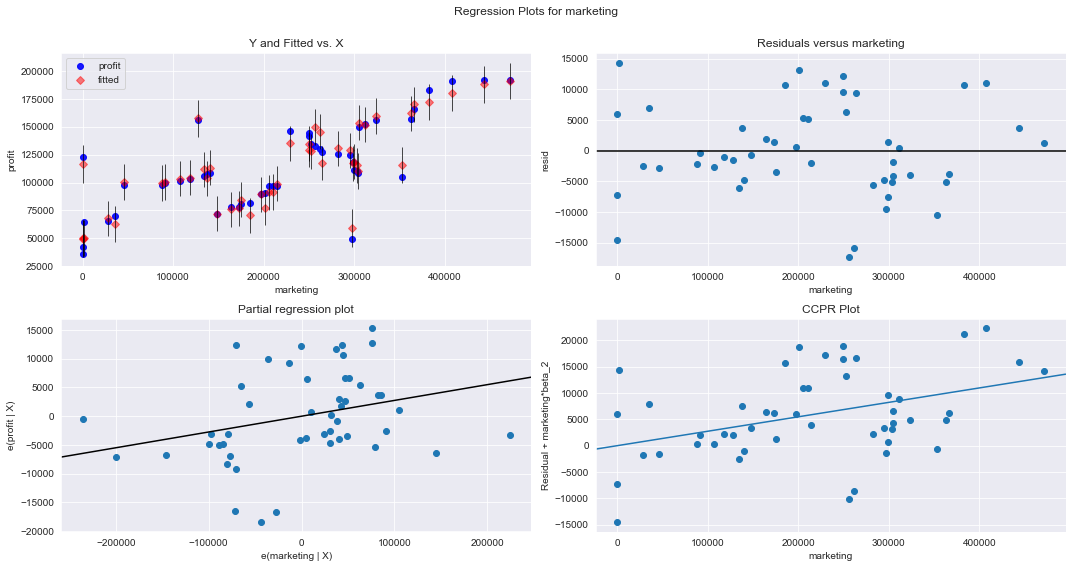

In [67]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model_with_rnd_marketing, "marketing", fig=fig)
plt.show()

eval_env: 1


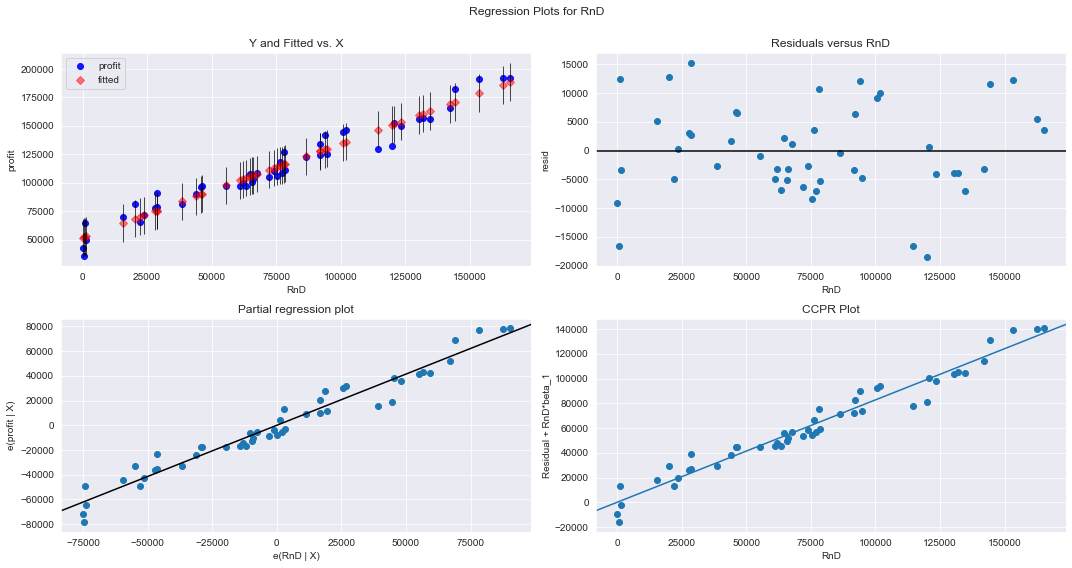

In [68]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model_with_rnd, "RnD", fig=fig)
plt.show()

### Let's predict new value using the same datasets

In [70]:
predicted = pd.DataFrame()
predicted['RnD'] = df4.RnD
predicted['marketing'] = df4.marketing
predicted['Profit'] = df4.profit
predicted['Predicted_Profit'] = pd.DataFrame(model_with_rnd_marketing.predict(predicted[['RnD','marketing']]))
predicted

,RnD,marketing,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,190942.726927
1,162597.70,443898.53,191792.06,188043.924520
2,153441.51,407934.54,191050.39,179957.312472
3,144372.41,383199.62,182901.99,172246.416164
4,142107.34,366168.42,166187.94,170022.687457
5,131876.90,362861.36,156991.12,161999.405410
6,134615.46,127716.82,156122.51,157669.178690
7,130298.13,323876.68,155752.60,159705.298181
8,120542.52,311613.29,152211.77,151804.380605
9,123334.88,304981.62,149759.96,153787.521922


In [72]:
# say New data for prediction is
new_data=pd.DataFrame({'RnD':0.0,"marketing":45173.06},index=[0])
new_data

,RnD,marketing
0,0.0,45173.06


In [74]:
new_data['predited_profit']=model_with_rnd_marketing.predict(new_data)
new_data

,RnD,marketing,predited_profit
0,0.0,45173.06,51025.067542


### Table containing R^2 value for each prepared model 

In [76]:
models={'Different_Models':['Raw_data','Mean_Imputation_Outlier','Median_Imputation_outlier','Removed_outlier','Final_Model after dropping admin feature'],
        'R_squared':[model.rsquared,model_after_mean_imputation.rsquared,model_after_median_imputation.rsquared,model_after_removing_outlier.rsquared,model_with_rnd_marketing.rsquared],
        'R_squared_adjusted':[model.rsquared_adj,model_after_mean_imputation.rsquared_adj,model_after_median_imputation.rsquared_adj,model_after_removing_outlier.rsquared_adj,model_with_rnd_marketing.rsquared_adj],
       'RMSE':[np.sqrt(model.mse_resid),np.sqrt(model_after_mean_imputation.mse_resid),np.sqrt(model_after_median_imputation.mse_resid),np.sqrt(model_after_removing_outlier.mse_resid),np.sqrt(model_with_rnd_marketing.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Mean_Imputation_Outlier,0.911954,0.906212,11570.325358
2,Median_Imputation_outlier,0.918296,0.912967,11148.345424
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Final_Model after dropping admin feature,0.961086,0.959394,7691.884749
